In [1]:
from dynadojo.utils.complexity_measures import corr_dim, multi_en, find_lyapunov_exponents, find_max_lyapunov
from dynadojo.wrappers import SystemChecker
from dynadojo.systems.gilpin_flows import GilpinFlowsSystem
from dynadojo.utils.gilpin_lorenz_tunable_complexity import compute_complexity
from dynadojo.utils.lds import plot
import matplotlib.pyplot as plt

In [ ]:
n = 5
timesteps = 250
for i in range(10):
    system = SystemChecker(GilpinFlowsSystem(system_name='Lorenz', params={'rho': i + 30}, seed=20))
    x0 = system.make_init_conds(n)
    x = system.make_data(x0, timesteps=timesteps)
    plot([x])
    print(compute_complexity(system, timesteps, corr_dim))
    plt.show

1.6156326137284183


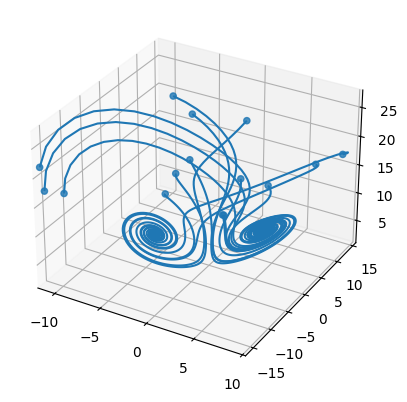

In [7]:
n = 15
timesteps = 500
system = SystemChecker(GilpinFlowsSystem(system_name="Lorenz", params={'rho':7.852466167233247}))
x0 = system.make_init_conds(n)
x = system.make_data(x0, timesteps=timesteps)
plot([x])
print(compute_complexity(system, timesteps, corr_dim))

In [ ]:
# Update params without reinstantiating system
system._system.update_params({'rho':8})
x0 = system.make_init_conds(15)
x = system.make_data(x0, timesteps=timesteps)
print(compute_complexity(system, timesteps, corr_dim))
plot([x])
plt.show()
print(x)

In [2]:
from dynadojo.utils.gilpin_lorenz_tunable_complexity import explore_parameter_space_adaptively

system_checker = SystemChecker(GilpinFlowsSystem(system_name="Lorenz", seed=42))
timesteps = 500
complexity_func = corr_dim  

param_values, complexities = explore_parameter_space_adaptively(system_checker, n_initial_samples=5, max_iters=20, timesteps=timesteps, complexity_func=complexity_func)

Initial param samples: [ 0.         30.43396071 43.02311671 28.87402586 18.45876889  2.35545388
 50.        ]
Large jump detected at iteration 0. Refining sampling.
Large jump detected at iteration 1. Refining sampling.
Large jump detected at iteration 2. Refining sampling.
Large jump detected at iteration 3. Refining sampling.
Final param samples: [ 0.          0.29443174  0.58886347  0.88329521  1.17772694  2.35545388
  6.38128263  7.38773982  8.39419701  9.4006542  10.40711139 11.41356857
 12.42002576 13.42648295 14.43294014 18.45876889 28.87402586 30.43396071
 43.02311671 50.        ]
Final complexities: [1.26704817 1.34802374 1.39405598 1.46331972 1.54599067 1.45463004
 1.54077782 1.58538703 1.6501712  1.70760274 1.77371581 1.83375242
 1.89983578 1.96900324 2.02526782 2.06062212 2.01444864 2.04236268
 2.1192512  2.13070631]


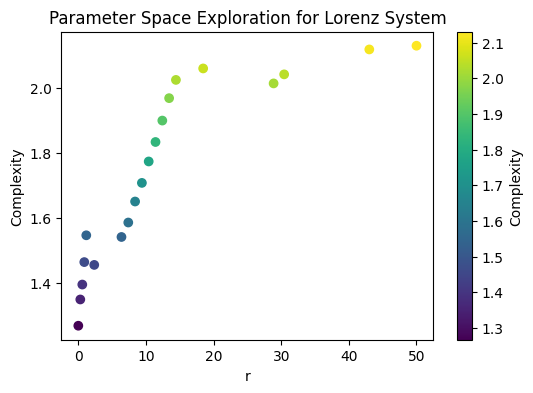

In [3]:
from dynadojo.utils.gilpin_lorenz_tunable_complexity import plot_parameter_space_lorenz

plot_parameter_space_lorenz(param_values, complexities)

In [4]:
print(param_values.size)

20


In [5]:
# Save to CSV
import pandas as pd

df = pd.DataFrame({
    'rho': param_values.flatten(),
    'complexities': complexities
})

df.to_csv('parameter_space_lorenz_6.csv', index=False)


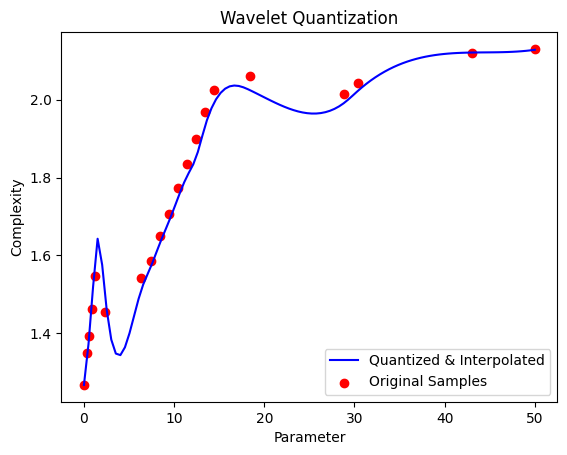

In [5]:
from dynadojo.utils.gilpin_lorenz_tunable_complexity import wavelet_quantize, plot_wavelet_quantization

param_range, interpolated_complexities = wavelet_quantize(param_values, complexities, wavelet='db1', level=1, quantization_levels=8, num_points=100)

plot_wavelet_quantization(param_range, interpolated_complexities, param_values, complexities)

In [6]:
from dynadojo.utils.gilpin_lorenz_tunable_complexity import find_parameters_for_target_complexity

target_complexity = 1.8

params_for_target = find_parameters_for_target_complexity(param_values, complexities, target_complexity)

print("Parameters for Target Complexity:", params_for_target)

Parameters for Target Complexity: 7.852466167233247
